In [22]:
import numpy as np
import csv
import re
from sympy import Matrix
from sympy import init_printing

# Initialiser l'affichage de sympy pour une meilleure présentation
init_printing()

# Lire le fichier CSV et convertir les données en matrice
with open('Matrices/K.csv', encoding='utf-8-sig') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    
    # Convertir en matrice (liste de listes)
    K = [ligne[:18] for ligne in list(lecteur_csv)[:18]]
    K = [[float(cellule) for cellule in ligne] for ligne in K]

# Convertir la liste de listes en une matrice sympy
K_sympy = Matrix(K)

# Afficher la matrice sympy
K_sympy


ModuleNotFoundError: No module named 'sympy'

In [3]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from scipy.signal import freqresp

In [24]:
# Définition des constantes 
J = 7.62e-4 #kg.m2
Kt = 3.73e3 #N.m/rad
Me = 50 #N.m
r = 2 #-
Nddl = 3 #T1, T2, A4

# Définition des matrices
M = np.zeros([Nddl, Nddl])
K = np.zeros([Nddl, Nddl])
F = np.zeros(Nddl)

# Remplissage des matrices
  # Pour K

K=np.zeros([3,3])

K[0][0]=7460
K[0][1]=-3730
K[1][0]=-3730
K[1][1]=18650
K[1][2]=-14920
K[2][1]=-14920
K[2][2]=14920

print(K)

  # Pour M
M[0][0] = 0.000762
M[1][1] = 0.001524
M[2][2] = 0.003048

print(M)

  # Pour F
F[0]=Me

[[  7460.  -3730.      0.]
 [ -3730.  18650. -14920.]
 [     0. -14920.  14920.]]
[[0.000762 0.       0.      ]
 [0.       0.001524 0.      ]
 [0.       0.       0.003048]]


In [25]:
# 1. Calcul des valeurs propres et vecteurs propres
# Résolution du problème aux valeurs propres généralisé: (K - ω^2 M)φ = 0
eigvals, eigvecs = scipy.linalg.eig(K, M)

# Filtrer les valeurs propres réelles positives
idx = np.argsort(np.real(eigvals))
eigvals_real = np.real(eigvals)
eigvecs_real = np.real(eigvecs)

# Filtrer les valeurs propres réelles positives
# Cela suppose que les valeurs propres avec des parties réelles négatives indiquent une instabilité
positive_idx = eigvals_real > 0
eigvals_real = eigvals_real[positive_idx]
eigvecs_real = eigvecs_real[:, positive_idx]

# Calcul des fréquences propres en Hz
omega_n = np.sqrt(np.real(eigvals))  # en rad/s
freq_n = omega_n / (2 * np.pi)       # en Hz

# Calcul des amortissements modaux
# On suppose C = αM + βK, ce qui donne les amortissements modaux
modal_damping = (alpha + beta * np.real(eigvals)) / (2 * np.sqrt(np.real(eigvals)))

print("Fréquences naturelles (Hz) :", freq_n)
print("Amortissements modaux :", modal_damping)
print("Vecteurs propres (formes modales) :\n", eigvecs)

Fréquences naturelles (Hz) : [666.97490169 477.17004986  97.00486582]
Amortissements modaux : [83.81454044 59.96296026 12.19000736]
Vecteurs propres (formes modales) :
 [[ 0.50653302  0.96896639  0.33264227]
 [-0.80425904  0.15858458  0.64003983]
 [ 0.31079206 -0.18961819  0.69260244]]


[[ 0.50653302  0.96896639  0.33264227]
 [-0.80425904  0.15858458  0.64003983]
 [ 0.31079206 -0.18961819  0.69260244]]
[17562191.97166494+0.j  8988890.50826208+0.j   371489.69855067+0.j]


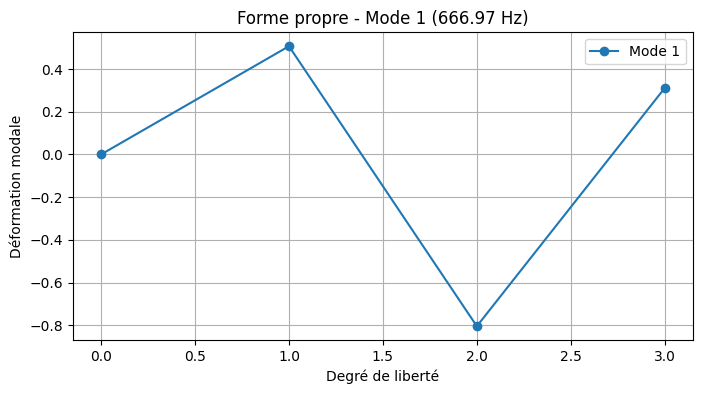

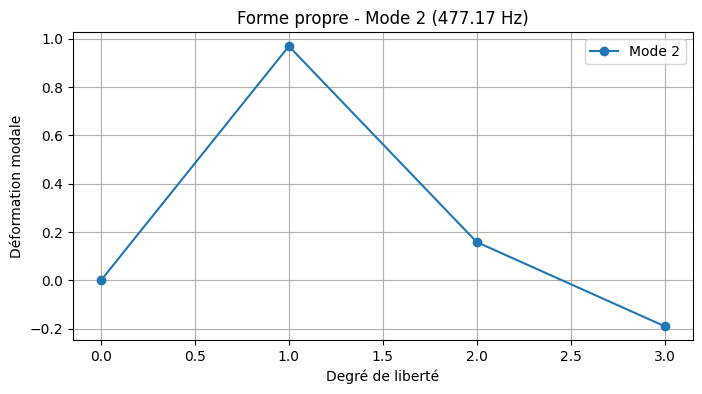

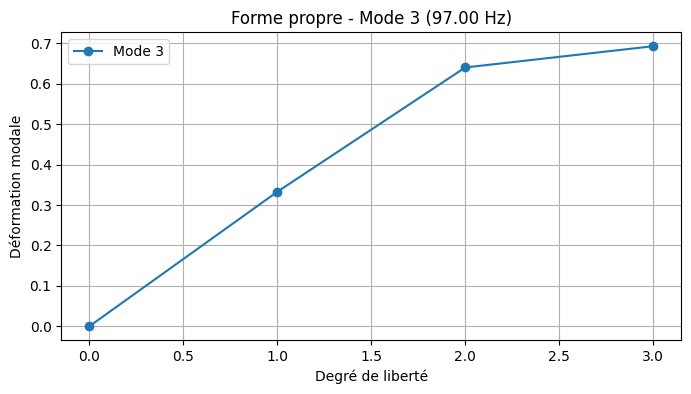

"plt.figure(figsize=(10, 6))\nfor i in range(num_modes):\n    plt.subplot(num_modes, 1, i+1)\n    plt.plot(eigvecs_real[:, i], marker='o', linestyle='-')\n    plt.xlabel('Degré de liberté')\n    plt.ylabel('Déformation modale')\n    plt.title(f'Forme propre - Mode {i+1} ({freq_n[i]:.2f} Hz)')\n    plt.grid(True)\nplt.tight_layout()\nplt.show()"

In [28]:
# 2. Tracé des déformations modales
num_modes = eigvecs.shape[1]

print(eigvecs)
print(eigvals)

num_modes = eigvecs_real.shape[1]
num_dofs = eigvecs_real.shape[0]

eigvecs_with_dof0 = np.vstack((np.zeros((1, num_modes)), eigvecs_real))

# Définir les positions des DOFs pour la visualisation
# Par exemple, si vous avez 2 DOFs libres, DOF 0 est à gauche, DOF 1 et DOF 2 sont les libres
dof_positions = np.arange(0, num_dofs + 1)  # DOF 0 à DOF n

# Option 1: Tracer chaque mode dans une fenêtre séparée
for i in range(num_modes):
    plt.figure(figsize=(8, 4))
    plt.plot(dof_positions, eigvecs_with_dof0[:, i], marker='o', linestyle='-')
    plt.xlabel('Degré de liberté')
    plt.ylabel('Déformation modale')
    plt.title(f'Forme propre - Mode {i+1} ({freq_n[i]:.2f} Hz)')
    plt.grid(True)
    plt.legend([f'Mode {i+1}'])
    plt.show()

# Option 2: Utiliser des sous-graphiques pour afficher tous les modes dans une seule fenêtre
# Décommentez les lignes suivantes si vous préférez cette option

"""plt.figure(figsize=(10, 6))
for i in range(num_modes):
    plt.subplot(num_modes, 1, i+1)
    plt.plot(eigvecs_real[:, i], marker='o', linestyle='-')
    plt.xlabel('Degré de liberté')
    plt.ylabel('Déformation modale')
    plt.title(f'Forme propre - Mode {i+1} ({freq_n[i]:.2f} Hz)')
    plt.grid(True)
plt.tight_layout()
plt.show()"""


C:\Users\aymer\AppData\Local\Temp\ipykernel_8444\2891461976.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


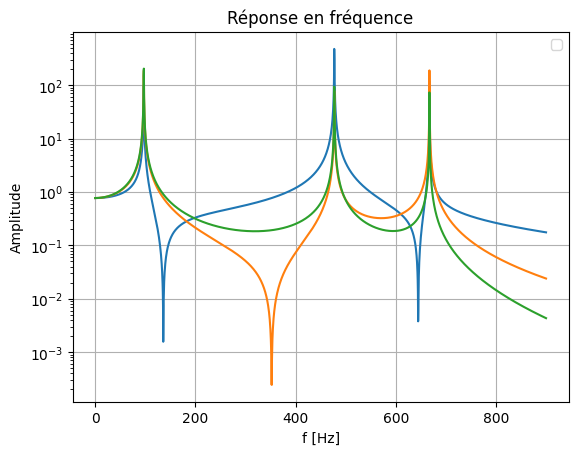

In [36]:
def repFrequence(M, K, F, fmin, fmax, Nddl):
    convPulsFreq = 1/(2*3.14)
    convRadDeg = 180/3.14

    w = np.linspace(fmin/convPulsFreq, fmax/convPulsFreq, 2000)
    
    Teta = np.zeros([Nddl, len(w)])

    for i, x in enumerate(w):
        A = K - (x**2)*M
        #print("\n", A, "\n")

        B = np.linalg.inv(A)

        X = np.dot(B,F)
        #print("\nX :\n", X)
        for j,Y in enumerate(X):
            Teta[j][i] = np.abs(Y*convRadDeg)
    
    return(w*convPulsFreq, Teta)

f_min = 0
f_max = 900
data = repFrequence(M, K, F, f_min, f_max, 3)

plt.plot(data[0], data[1][0])
plt.plot(data[0], data[1][1])
plt.plot(data[0], data[1][2])
plt.yscale('log')
plt.title("Réponse en fréquence")
plt.xlabel("f [Hz]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

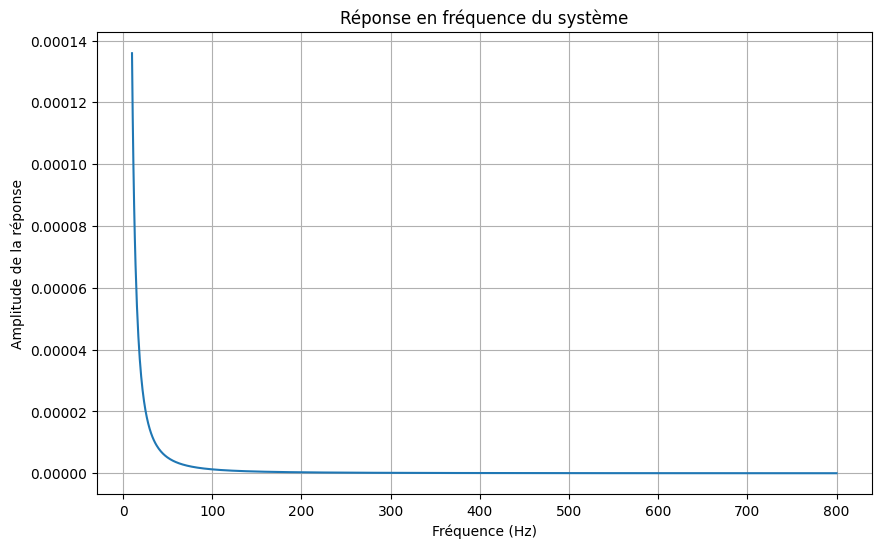

In [9]:

# 3. Calcul et tracé de la réponse en fréquence
# Définir la plage de fréquences
f_min = 10
f_max = 800
frequencies = np.linspace(f_min, f_max, 1000)
omega = 2 * np.pi * frequencies

# Initialisation de la réponse
response = np.zeros_like(omega, dtype=complex)

# Supposons une excitation harmonique sur le premier degré de liberté
# Vecteur d'excitation (par exemple, excitation unitaire sur le premier DOF)
F = np.array([1.0, 0.0])

# Calcul de la réponse pour chaque fréquence
for i, w in enumerate(omega):
    # Matrice dynamique: -w^2 M + j w C + K
    Z = -w**2 * M + 1j * w * C + K
    # Résolution de Z x = F
    x = scipy.linalg.solve(Z, F)
    # On peut prendre la norme de la réponse ou un DOF spécifique
    response[i] = np.linalg.norm(x)

# Tracé de la réponse en fréquence
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(response))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude de la réponse')
plt.title('Réponse en fréquence du système')
plt.grid(True)
plt.show()